In [39]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("Movie_classification.csv", header=0)

In [41]:
data.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [43]:
mean_time = data['Time_taken'].mean()
data['Time_taken'].fillna(value=mean_time, inplace=True)
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [44]:
data.describe(include='all')

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,...,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455,0.551383,0.306324,0.191700,0.361660
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,...,30.921101,104.779133,12.513697,106.332889,18364.351764,0.498422,0.497845,0.461422,0.394028,0.480957
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,...,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,...,132.690000,223.796000,28.000000,465.000000,34050.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,...,158.980000,254.400000,39.000000,535.500000,42400.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,...,181.520000,283.416000,50.000000,614.750000,50000.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,...,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_data = data.drop(columns='Start_Tech_Oscar')
Y_data = data['Start_Tech_Oscar']
X_train, X_test, Y_train, Y_actual = train_test_split(X_data, Y_data, train_size=0.85, random_state=42)

In [46]:
clf_tree = tree.DecisionTreeClassifier(max_depth=5)
clf_tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5)

In [47]:
Y_train_predicted = clf_tree.predict(X_train)
Y_test_predicted = clf_tree.predict(X_test)
Y_test_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [48]:
#Confusion Matrix for train set
confusion_matrix(Y_train, Y_train_predicted)

array([[172,  29],
       [ 94, 135]], dtype=int64)

In [49]:
# Confusion Matrix for test set
confusion_matrix(Y_actual, Y_test_predicted)

array([[18, 11],
       [29, 18]], dtype=int64)

In [50]:
accuracy_score(Y_actual, Y_test_predicted)

0.47368421052631576

In [51]:
from IPython.display import Image
import pydotplus

# Tree

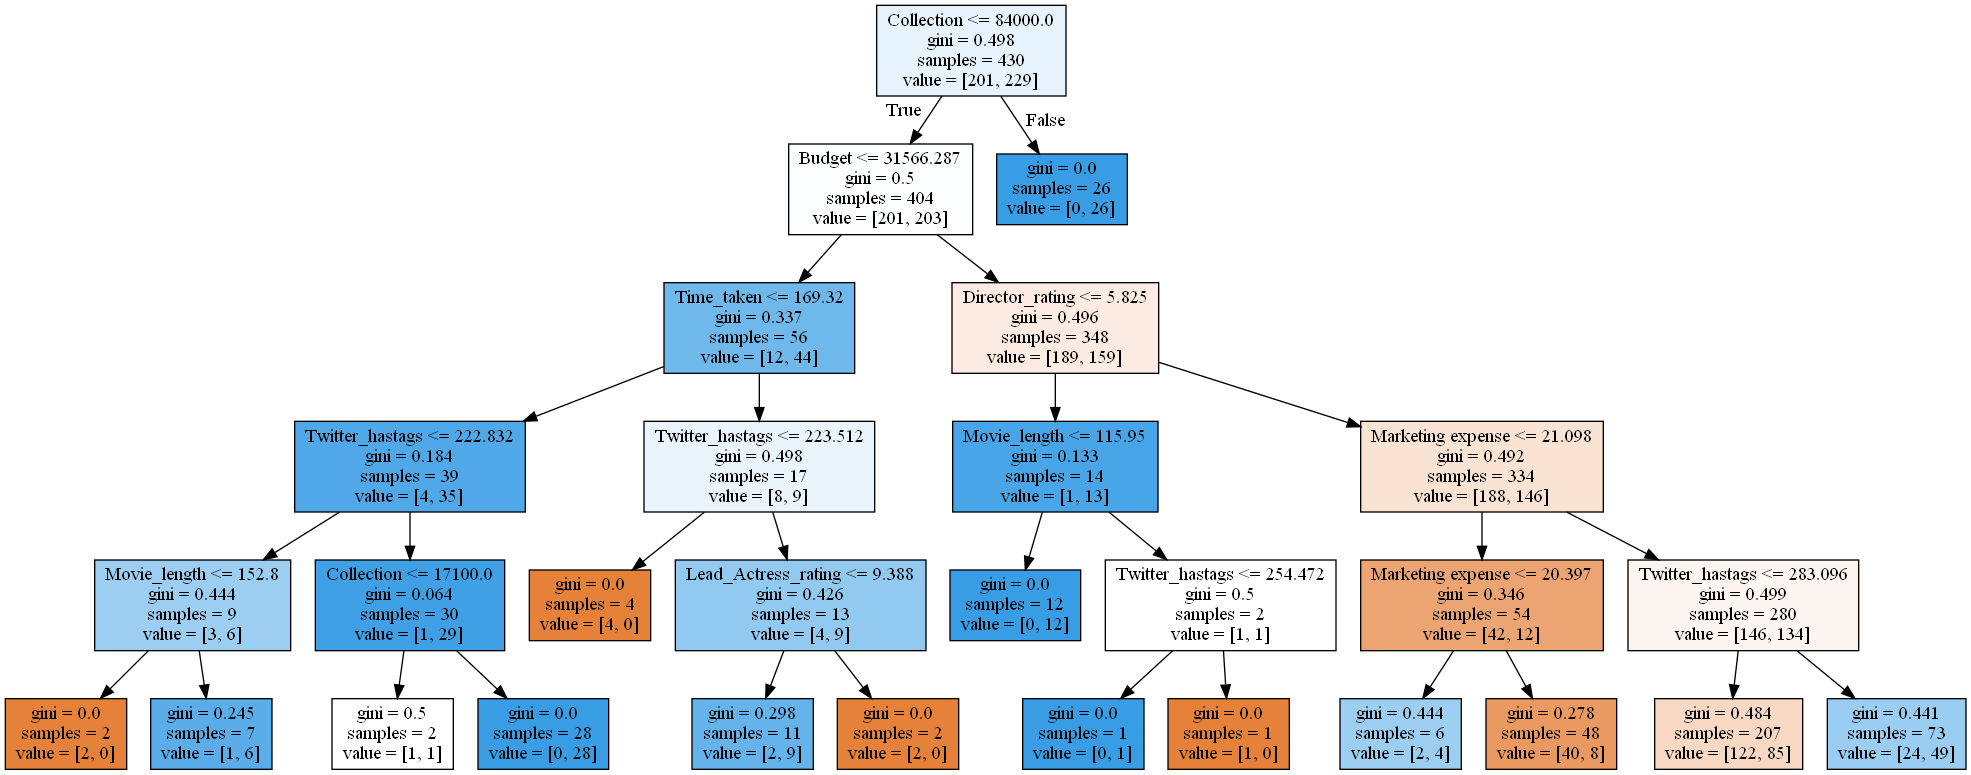

In [52]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, feature_names=X_data.columns, filled=True)
graph_ = pydotplus.graph_from_dot_data(dot_data)
Image(graph_.create_png())


# Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier

In [54]:
clf_b = tree.DecisionTreeClassifier()
bag_clf = BaggingClassifier(
    base_estimator=clf_b,
    bootstrap=True,
    n_estimators=1000,
    random_state=42
)

In [55]:
bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  random_state=42)

In [56]:
Y_pred_bag_train = bag_clf.predict(X_train)
Y_pred_bag_test = bag_clf.predict(X_test)

In [57]:
# Train set confusion matrix
confusion_matrix(Y_train, Y_pred_bag_train)

array([[201,   0],
       [  0, 229]], dtype=int64)

In [58]:
#Test Set Confusion Matrix
confusion_matrix(Y_actual, Y_pred_bag_test)

array([[17, 12],
       [15, 32]], dtype=int64)

In [59]:
print("Accuracy Score using Bagging Classifier:", accuracy_score(Y_actual, Y_pred_bag_test))

Accuracy Score using Bagging Classifier: 0.6447368421052632


# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state= 42)

In [62]:
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [63]:
Y_pred_rf_train = rf_clf.predict(X_train)
Y_pred_rf_test = rf_clf.predict(X_test)

In [64]:
# Train set confusion matrix
confusion_matrix(Y_train, Y_pred_rf_train)

array([[201,   0],
       [  0, 229]], dtype=int64)

In [65]:
#Test Set Confusion Matrix
confusion_matrix(Y_actual, Y_pred_rf_test)

array([[17, 12],
       [14, 33]], dtype=int64)

In [66]:
print("Accuracy Score using Random Forest Classifier:", accuracy_score(Y_actual, Y_pred_rf_test))

Accuracy Score using Random Forest Classifier: 0.6578947368421053


# Grid-Search

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
rf_clf = RandomForestClassifier(n_estimators= 1000, random_state= 42)
param_grid = {
    'max_features': [4, 5, 6, 7, 8, 9, 10, 11],
    'min_samples_split': [2, 5, 8]
}

In [69]:
grid_search = GridSearchCV(rf_clf, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [70]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [2, 5, 8]},
             scoring='accuracy')

In [71]:
print(grid_search.best_params_)

{'max_features': 9, 'min_samples_split': 5}


In [72]:
gr_src_clf = grid_search.best_estimator_

In [73]:
Y_predicted_grid_src = gr_src_clf.predict(X_test)

In [74]:
print("Accuracy Score using Random Forest Classifier with Grid Search is", accuracy_score(Y_actual, Y_predicted_grid_src))

Accuracy Score using Random Forest Classifier with Grid Search is 0.618421052631579
